In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Replace '4' with the number of cores you want to use
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="joblib")


In [59]:
df=pd.read_csv("heart_disease_risk_dataset_corrupted.csv")
df

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0,0,0,1,0,0,0,0,NaN,0.0,0,1,0,1,0,0,0,48,0
1,0,1,0,1,0,0,0,0,2.0,0.0,0,1,1,0,0,0,0,46,0
2,1,0,0,1,0,0,0,0,1.0,1.0,0,1,1,1,0,0,1,66,0
3,1,1,0,1,0,0,1,1,1.0,NaN,1,1,0,1,1,1,1,0,1
4,0,0,1,0,1,0,0,0,NaN,0.0,1,0,0,0,0,0,0,69,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72095,1,1,1,1,1,1,1,1,0.0,1.0,0,1,1,0,0,0,1,48,1
72096,1,1,1,1,0,1,1,1,1.0,0.0,0,0,1,1,1,1,0,47,1
72097,1,0,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,25,0
72098,0,1,0,0,1,0,0,0,0.0,1.0,0,1,1,1,1,1,0,47,0


In [47]:
df.duplicated().sum()

5843

In [60]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66257 entries, 0 to 72099
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           66257 non-null  int64  
 1   Shortness_of_Breath  66257 non-null  int64  
 2   Fatigue              66257 non-null  int64  
 3   Palpitations         66257 non-null  int64  
 4   Dizziness            66257 non-null  int64  
 5   Swelling             66257 non-null  int64  
 6   Pain_Arms_Jaw_Back   66257 non-null  int64  
 7   Cold_Sweats_Nausea   66257 non-null  int64  
 8   High_BP              56315 non-null  float64
 9   High_Cholesterol     56057 non-null  float64
 10  Diabetes             66257 non-null  int64  
 11  Smoking              66257 non-null  int64  
 12  Obesity              66257 non-null  int64  
 13  Sedentary_Lifestyle  66257 non-null  int64  
 14  Family_History       66257 non-null  int64  
 15  Chronic_Stress       66257 non-null  int6

In [8]:
df.isnull().sum()

Chest_Pain                 0
Shortness_of_Breath        0
Fatigue                    0
Palpitations               0
Dizziness                  0
Swelling                   0
Pain_Arms_Jaw_Back         0
Cold_Sweats_Nausea         0
High_BP                 9942
High_Cholesterol       10200
Diabetes                   0
Smoking                    0
Obesity                    0
Sedentary_Lifestyle        0
Family_History             0
Chronic_Stress             0
Gender                     0
Age                     8110
Heart_Risk                 0
dtype: int64

In [61]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

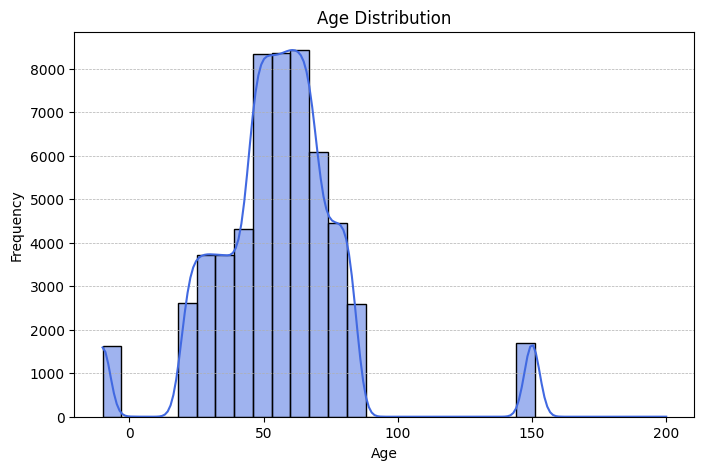

In [53]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='royalblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [10]:
df['Age'].isnull().sum()

10315

In [62]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [63]:
df['Age'].isnull().sum()

0

In [64]:
df['High_BP'].value_counts()

High_BP
0.0    27124
1.0    26749
2.0     2442
Name: count, dtype: int64

In [65]:
df = df[df['High_BP'] != 2.0]

In [66]:
df['High_BP'].value_counts()

High_BP
0.0    27124
1.0    26749
Name: count, dtype: int64

In [67]:
imputer = KNNImputer(n_neighbors=15)
df.loc[:, 'High_Cholesterol'] = imputer.fit_transform(df[['High_Cholesterol']]).round().astype(int)
print(df['High_Cholesterol'].value_counts())

High_Cholesterol
0.0    37011
1.0    26804
Name: count, dtype: int64


In [68]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=15)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print(df_imputed.isnull().sum())

Chest_Pain             0
Shortness_of_Breath    0
Fatigue                0
Palpitations           0
Dizziness              0
Swelling               0
Pain_Arms_Jaw_Back     0
Cold_Sweats_Nausea     0
High_BP                0
High_Cholesterol       0
Diabetes               0
Smoking                0
Obesity                0
Sedentary_Lifestyle    0
Family_History         0
Chronic_Stress         0
Gender                 0
Age                    0
Heart_Risk             0
dtype: int64


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63815 entries, 0 to 72099
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           63815 non-null  int64  
 1   Shortness_of_Breath  63815 non-null  int64  
 2   Fatigue              63815 non-null  int64  
 3   Palpitations         63815 non-null  int64  
 4   Dizziness            63815 non-null  int64  
 5   Swelling             63815 non-null  int64  
 6   Pain_Arms_Jaw_Back   63815 non-null  int64  
 7   Cold_Sweats_Nausea   63815 non-null  int64  
 8   High_BP              53873 non-null  float64
 9   High_Cholesterol     63815 non-null  float64
 10  Diabetes             63815 non-null  int64  
 11  Smoking              63815 non-null  int64  
 12  Obesity              63815 non-null  int64  
 13  Sedentary_Lifestyle  63815 non-null  int64  
 14  Family_History       63815 non-null  int64  
 15  Chronic_Stress       63815 non-null  int6

In [70]:
df.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
count,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,53873.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000
mean,0.496576,0.498143,0.496639,0.496545,0.499350,0.496733,0.499412,0.500243,0.496520,0.420027,0.500259,3.503628,0.497767,0.502217,0.496247,0.498942,0.547708,55.473290,0.497281
std,0.499992,0.500000,0.499993,0.499992,0.500003,0.499993,0.500004,0.500004,0.499993,0.493567,0.500004,16.610879,0.499999,0.499999,0.499990,0.500003,0.497723,23.443079,0.499997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,56.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,200.000000,1.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Chest_Pain'),
  Text(1, 0, 'Shortness_of_Breath'),
  Text(2, 0, 'Fatigue'),
  Text(3, 0, 'Palpitations'),
  Text(4, 0, 'Dizziness'),
  Text(5, 0, 'Swelling'),
  Text(6, 0, 'Pain_Arms_Jaw_Back'),
  Text(7, 0, 'Cold_Sweats_Nausea'),
  Text(8, 0, 'High_BP'),
  Text(9, 0, 'High_Cholesterol'),
  Text(10, 0, 'Diabetes'),
  Text(11, 0, 'Smoking'),
  Text(12, 0, 'Obesity'),
  Text(13, 0, 'Sedentary_Lifestyle'),
  Text(14, 0, 'Family_History'),
  Text(15, 0, 'Chronic_Stress'),
  Text(16, 0, 'Gender'),
  Text(17, 0, 'Age'),
  Text(18, 0, 'Heart_Risk')])

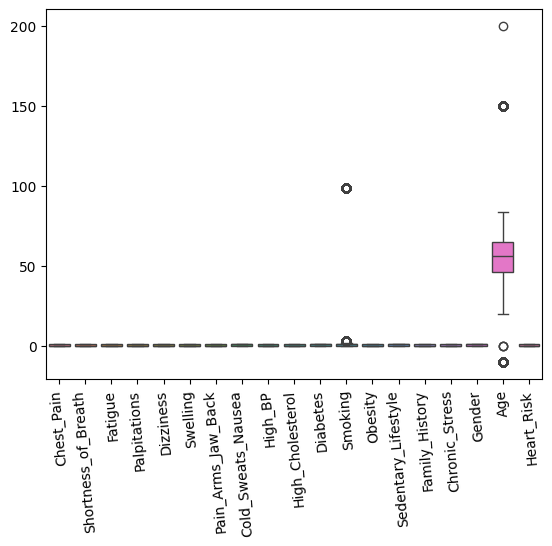

In [19]:
sns.boxplot(df)
plt.xticks(rotation=95)

<Axes: xlabel='Age'>

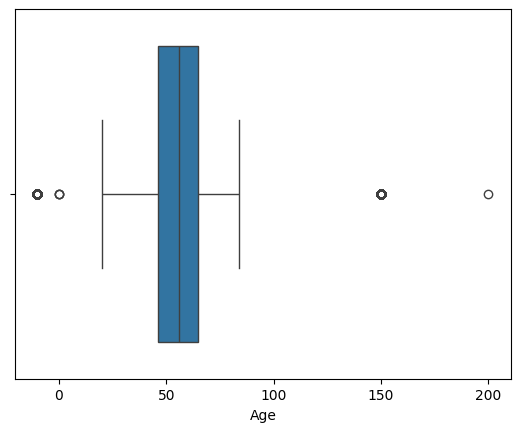

In [21]:
sns.boxplot(x=df['Age'])

In [22]:
(df['Age'] >= 18) & (df['Age'] <= 120)

0         True
2         True
3        False
4         True
5         True
         ...  
72064     True
72083     True
72084     True
72093     True
72099     True
Name: Age, Length: 63815, dtype: bool

In [23]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 120)]
print(df['Age'].describe())

count    60598.000000
mean        54.638734
std         15.004951
min         20.000000
25%         47.000000
50%         56.000000
75%         64.000000
max         84.000000
Name: Age, dtype: float64


In [24]:
print(df['Smoking'].value_counts())

Smoking
0     27708
1     27615
3      1801
99     1780
2      1694
Name: count, dtype: int64


In [71]:
most_frequent_value = df['Smoking'].mode()[0]
df['Smoking'] = df['Smoking'].apply(lambda x: most_frequent_value if x not in [0, 1] else x)

C:\Users\alaa\AppData\Local\Temp\ipykernel_14112\2255730755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Smoking'] = df['Smoking'].apply(lambda x: most_frequent_value if x not in [0, 1] else x)


In [26]:
print(df['Smoking'].value_counts())

Smoking
0    32983
1    27615
Name: count, dtype: int64


In [27]:
df['Smoking'].describe()

count    60598.000000
mean         0.455708
std          0.498038
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Smoking, dtype: float64

In [28]:
df.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
count,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,51156.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000
mean,0.496832,0.498152,0.496601,0.496271,0.500000,0.496683,0.499307,0.500231,0.496129,0.419898,0.500627,0.455708,0.498102,0.502904,0.496518,0.499109,0.548021,54.638734,0.497475
std,0.499994,0.500001,0.499993,0.499990,0.500004,0.499993,0.500004,0.500004,0.499990,0.493546,0.500004,0.498038,0.500001,0.499996,0.499992,0.500003,0.497693,15.004951,0.499998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,56.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,1.000000


Text(0.5, 1.02, 'Count of TARGET Variable per category')

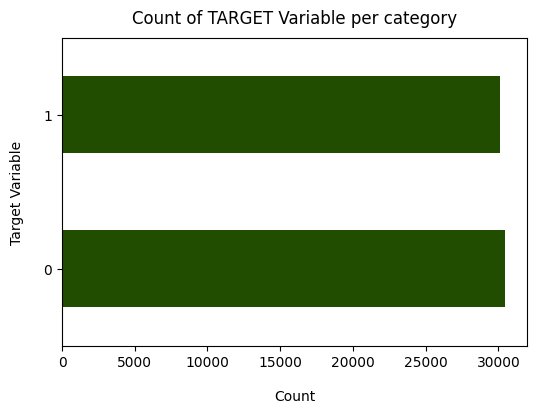

In [29]:
df['Heart_Risk'].value_counts().plot(kind='barh', color="#204D00", figsize=(6, 4))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

In [30]:
df['Heart_Risk'].value_counts()

Heart_Risk
0    30452
1    30146
Name: count, dtype: int64

In [31]:
# Checking which feature/column should be converted into Bins
for column in df.columns:
    print(f'{column} =>', df[column].value_counts().shape)

Chest_Pain => (2,)
Shortness_of_Breath => (2,)
Fatigue => (2,)
Palpitations => (2,)
Dizziness => (2,)
Swelling => (2,)
Pain_Arms_Jaw_Back => (2,)
Cold_Sweats_Nausea => (2,)
High_BP => (2,)
High_Cholesterol => (2,)
Diabetes => (2,)
Smoking => (2,)
Obesity => (2,)
Sedentary_Lifestyle => (2,)
Family_History => (2,)
Chronic_Stress => (2,)
Gender => (2,)
Age => (65,)
Heart_Risk => (2,)


In [32]:
bins = [18, 25, 35, 45, 55, float('inf')]
labels = ['18-25', '26-35', '36-45', '46-55', '56+']
df['Age_Binned'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
print(df['Age_Binned'].value_counts())

Age_Binned
56+      35294
46-55    11454
36-45     5690
26-35     5128
18-25     3032
Name: count, dtype: int64


C:\Users\alaa\AppData\Local\Temp\ipykernel_11056\3212478117.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Binned', data=df, palette='viridis')


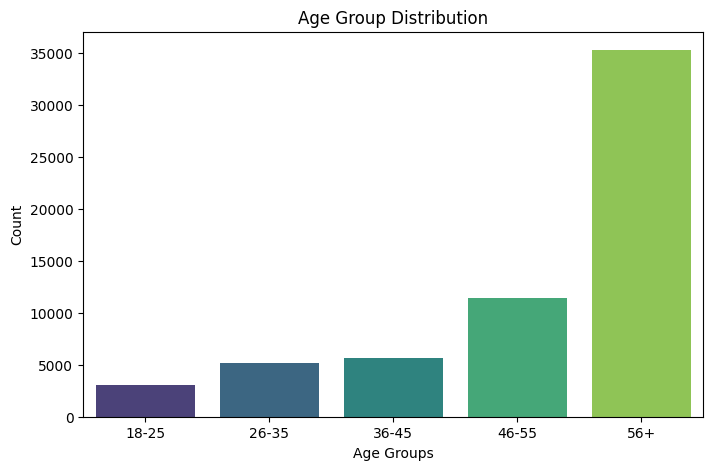

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Binned', data=df, palette='viridis')
plt.title('Age Group Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

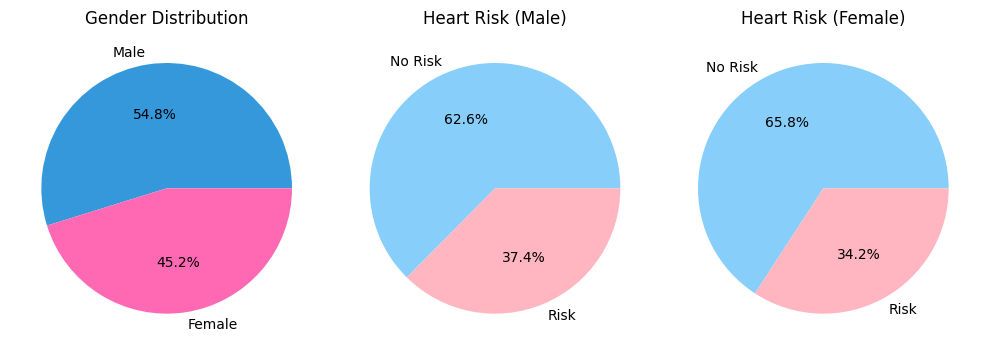

In [34]:
gender_colors = ['#3498db', '#ff69b4']
risk_colors = ['#87CEFA', '#FFB6C1']

gender_counts = df['Gender'].value_counts()

male_risk = df[df['Gender'] == 1]['Heart_Risk'].value_counts()
female_risk = df[df['Gender'] == 0]['Heart_Risk'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

axes[0].pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=gender_colors)
axes[0].set_title('Gender Distribution')

axes[1].pie(male_risk, labels=['No Risk', 'Risk'], autopct='%1.1f%%', colors=risk_colors)
axes[1].set_title('Heart Risk (Male)')

axes[2].pie(female_risk, labels=['No Risk', 'Risk'], autopct='%1.1f%%', colors=risk_colors)
axes[2].set_title('Heart Risk (Female)')

plt.tight_layout()
plt.show()

C:\Users\alaa\AppData\Local\Temp\ipykernel_11056\44318762.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_risk_counts = df.groupby(['Age_Binned', 'Heart_Risk']).size().unstack(fill_value=0)


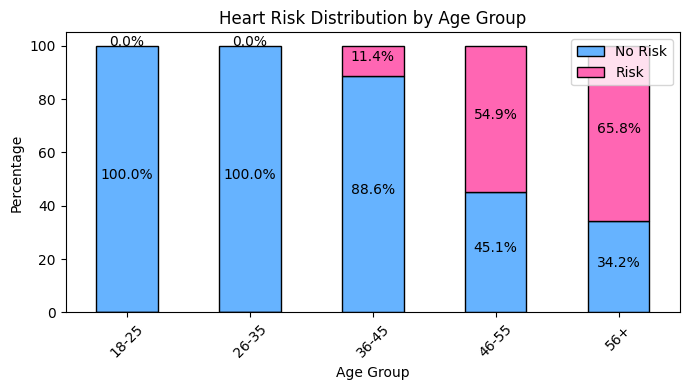

In [35]:
age_risk_counts = df.groupby(['Age_Binned', 'Heart_Risk']).size().unstack(fill_value=0)
age_risk_percent = age_risk_counts.div(age_risk_counts.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(7, 4))

colors = ['#66b3ff', '#ff66b3']
labels = ['No Risk', 'Risk']

bars = age_risk_percent.plot(kind='bar', stacked=True, color=colors, ax=ax, edgecolor='black')

for i, (no_risk, risk) in enumerate(zip(age_risk_percent[0], age_risk_percent[1])):
    ax.text(i, no_risk / 2, f'{no_risk:.1f}%', ha='center', color='black', fontsize=10)
    ax.text(i, no_risk + risk / 2, f'{risk:.1f}%', ha='center', color='black', fontsize=10)

ax.set_ylabel('Percentage')
ax.set_xlabel('Age Group')
ax.set_title('Heart Risk Distribution by Age Group')
ax.legend(labels)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

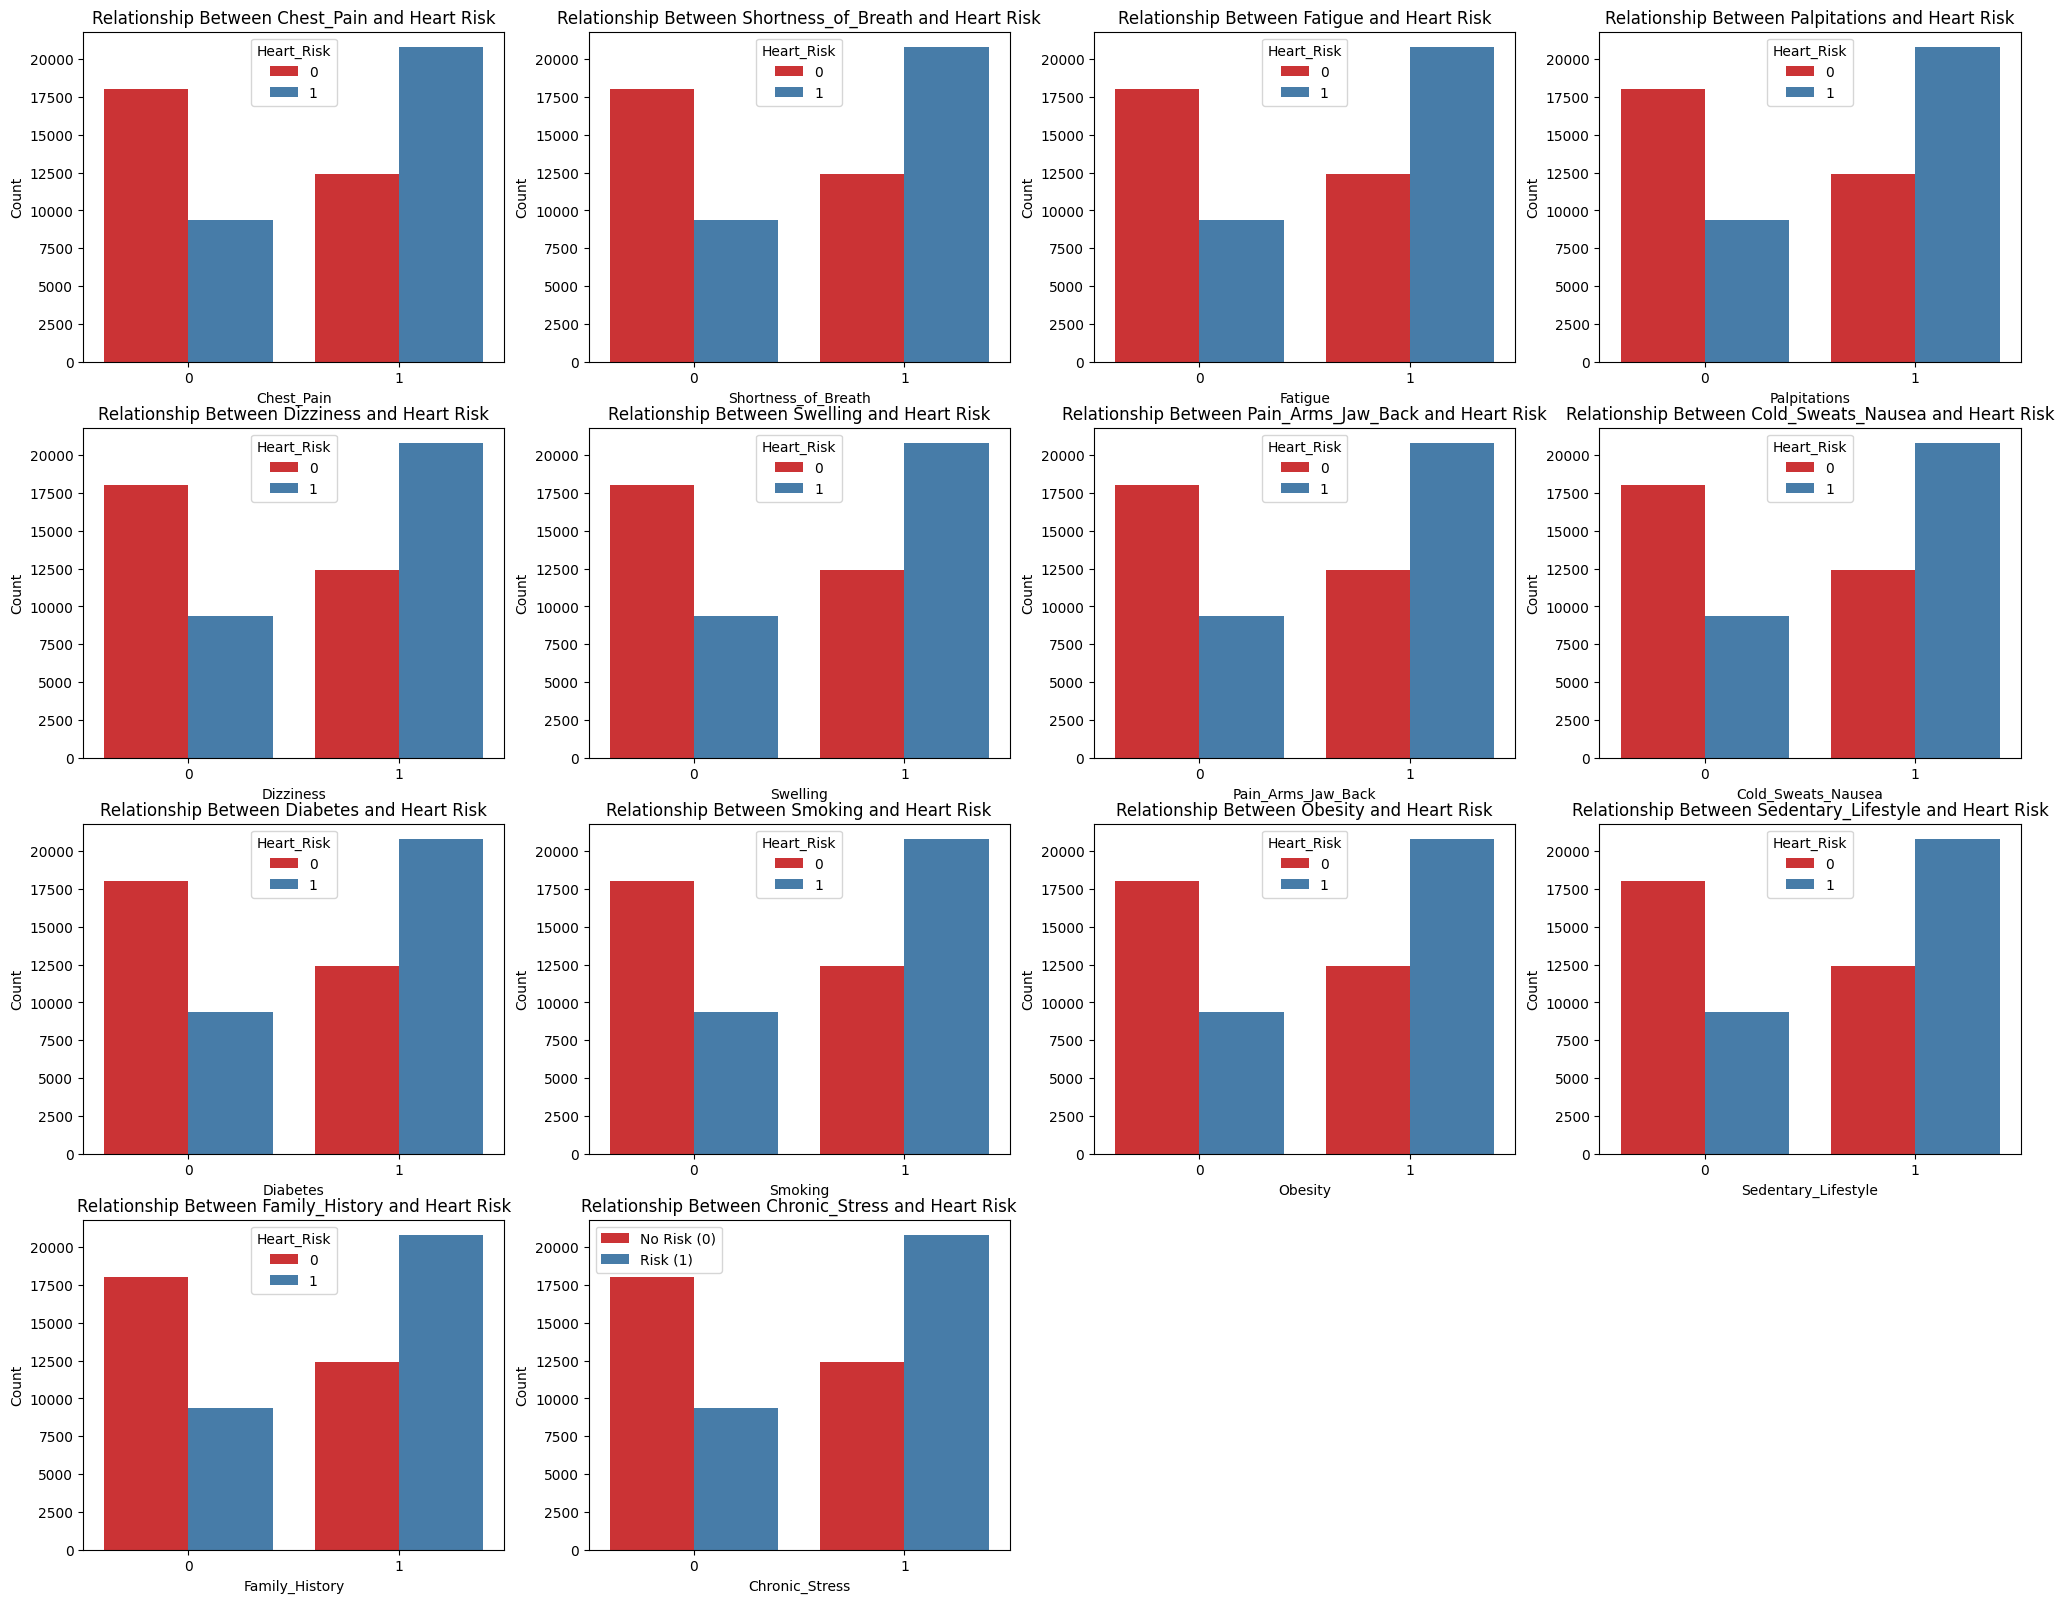

In [36]:
categorical_columns = ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness',
                       'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'Diabetes', 'Smoking',
                       'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress']

plt.figure(figsize=(25, 30))

for i, col in enumerate(categorical_columns, 1):

    plt.subplot(6,4, i)
    sns.countplot(x='Gender', hue='Heart_Risk', data=df, palette='Set1')
    plt.title(f'Relationship Between {col} and Heart Risk')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.legend(['No Risk (0)', 'Risk (1)'])
plt.show()

In [37]:
print(df.columns)

Index(['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations',
       'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea',
       'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity',
       'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender',
       'Age', 'Heart_Risk', 'Age_Binned'],
      dtype='object')


In [20]:
df = df.drop('Age_Binned', axis=1, errors='ignore')

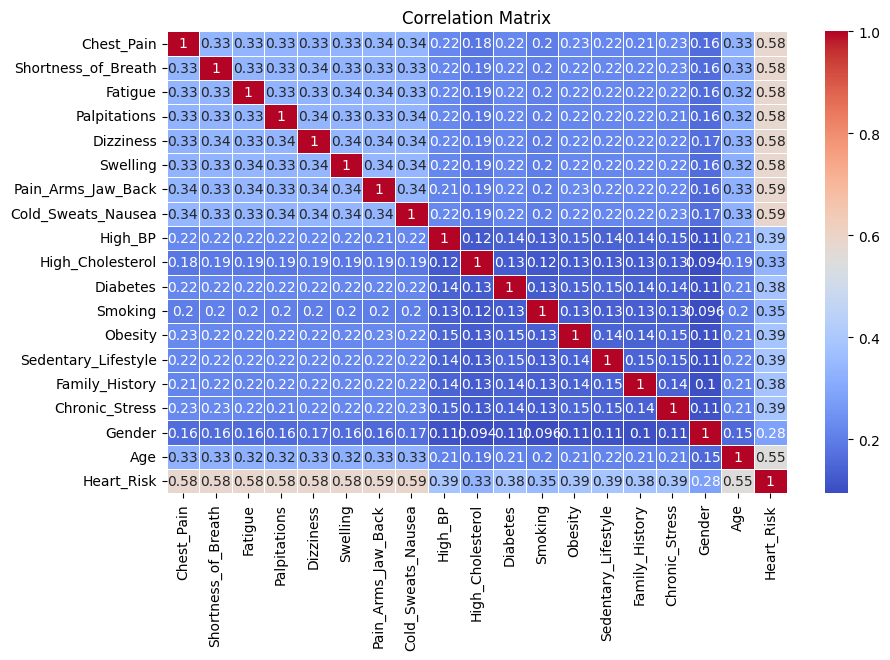

In [40]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

C:\Users\alaa\AppData\Local\Temp\ipykernel_14112\2823894458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = scaler.fit_transform(df[['Age']])


In [19]:
print(df['High_BP'].isnull().sum())

9942


In [20]:
print(df['High_BP'].unique())
print(df['High_BP'].value_counts())


[nan  1.  0.]
High_BP
0.0    27124
1.0    26749
Name: count, dtype: int64


In [21]:
print(df['High_BP'].isna().sum())
print(df['High_BP'].isnull().sum())


9942
9942


In [73]:
# Filling missing values using the mean
df['High_BP'].fillna(df['High_BP'].mean(), inplace=True)

# Filling missing values using the median
# df['High_BP'].fillna(df['High_BP'].median(), inplace=True)

# Checking for missing values after the treatment
print(df['High_BP'].isna().sum())

0


C:\Users\alaa\AppData\Local\Temp\ipykernel_14112\1442590550.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['High_BP'].fillna(df['High_BP'].mean(), inplace=True)
C:\Users\alaa\AppData\Local\Temp\ipykernel_14112\1442590550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['High_BP'].fillna(df['High_BP'].mean(), inplace=True)


In [74]:
from sklearn.model_selection import train_test_split

# Splitting the data into X (features) and y (target)
X = df.drop('Heart_Risk', axis=1)
y = df['Heart_Risk']

# Splitting the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Defining the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
}

# Training the models and evaluating them
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions on the test set

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")  # Print accuracy
    print(f"Classification Report:\n {classification_report(y_test, y_pred)}")  # Print classification report
    print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")  # Print confusion matrix
    print("="*50)  # Print a separator line


Model: Logistic Regression
Accuracy: 0.9880122228316227
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6385
           1       0.99      0.99      0.99      6378

    accuracy                           0.99     12763
   macro avg       0.99      0.99      0.99     12763
weighted avg       0.99      0.99      0.99     12763

Confusion Matrix:
 [[6310   75]
 [  78 6300]]
Model: Random Forest
Accuracy: 0.9891091436182715
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6385
           1       0.99      0.99      0.99      6378

    accuracy                           0.99     12763
   macro avg       0.99      0.99      0.99     12763
weighted avg       0.99      0.99      0.99     12763

Confusion Matrix:
 [[6318   67]
 [  72 6306]]
Model: SVM
Accuracy: 0.9906761733134843
Classification Report:
               precision    recall  f

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the Logistic Regression model
log_reg = LogisticRegression()

# Specify the parameters to test
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter (C)
    'solver': ['liblinear', 'saga'],  # Solver selection
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the model using the best parameters
best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after hyperparameter tuning: {accuracy}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Accuracy after hyperparameter tuning: 0.9878555198621014


In [78]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_log_reg, X, y, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Cross-Validation Accuracy: 0.9878 ± 0.0013


In [ ]:
import joblib

# Save the trained model
joblib.dump(best_log_reg, 'final_logistic_regression_model.pkl')

In [ ]:
# !streamlit run app.py


^C


In [ ]:
# import mlflow
# import mlflow.sklearn
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import os
# from mlflow import MlflowClient

# mlflow.set_tracking_uri("http://127.0.0.1:5000")

# mlflow.set_experiment("experiment2")


# client = MlflowClient()

# with mlflow.start_run():
#     for name, model in models.items():
#         with mlflow.start_run(nested=True):
#             model.fit(X_train, y_train)
#             y_pred = model.predict(X_test)
#             version=1
#             mlflow.log_param("model_name", name)
#             mlflow.log_param("algorithm", name)
            
#             accuracy = accuracy_score(y_test, y_pred)
#             mlflow.log_metric("accuracy", accuracy)

#             mlflow.sklearn.log_model(model, name)
#             mlflow.sklearn.log_model(model, "model")

#             # Build model URI from the run ID
#             model_uri = f"runs:/{mlflow.active_run().info.run_id}/model"

#             # Register the model to the MLflow Model Registry
#             result = mlflow.register_model(model_uri=model_uri, name=name)
#             version = result.version  # Automatically assigned version 
            
           

#             print(f"Model: {name}")
#             print(f"Accuracy: {accuracy}")
#             print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
#             print("="*50)

# mlflow.end_run()


2025/05/14 15:39:33 INFO mlflow.tracking.fluent: Experiment with name 'experiment2' does not exist. Creating a new experiment.
2025/05/14 15:39:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/14 15:40:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Logistic Regression' already exists. Creating a new version of this model...
2025/05/14 15:40:22 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic Regression, version 3
Created version '3' of model 'Logistic Regression'.


Model: Logistic Regression
Accuracy: 0.9880122228316227
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6385
           1       0.99      0.99      0.99      6378

    accuracy                           0.99     12763
   macro avg       0.99      0.99      0.99     12763
weighted avg       0.99      0.99      0.99     12763

🏃 View run clean-smelt-51 at: http://127.0.0.1:5000/#/experiments/149914103756672466/runs/9a1039d9671f457284820009648a10b4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/149914103756672466


2025/05/14 15:40:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/14 15:41:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Random Forest' already exists. Creating a new version of this model...
2025/05/14 15:41:02 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest, version 2
Created version '2' of model 'Random Forest'.


Model: Random Forest
Accuracy: 0.9883256287706652
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6385
           1       0.99      0.99      0.99      6378

    accuracy                           0.99     12763
   macro avg       0.99      0.99      0.99     12763
weighted avg       0.99      0.99      0.99     12763

🏃 View run youthful-bear-186 at: http://127.0.0.1:5000/#/experiments/149914103756672466/runs/4f80ca0fdce94866b058114de2ae5665
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/149914103756672466


2025/05/14 15:41:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/14 15:41:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'SVM' already exists. Creating a new version of this model...
2025/05/14 15:41:58 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SVM, version 2
Created version '2' of model 'SVM'.


Model: SVM
Accuracy: 0.9906761733134843
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6385
           1       0.99      0.99      0.99      6378

    accuracy                           0.99     12763
   macro avg       0.99      0.99      0.99     12763
weighted avg       0.99      0.99      0.99     12763

🏃 View run debonair-wren-775 at: http://127.0.0.1:5000/#/experiments/149914103756672466/runs/6e6fd14bb30845c5b5da6415cc3e424b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/149914103756672466


2025/05/14 15:42:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/14 15:42:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'KNN' already exists. Creating a new version of this model...
2025/05/14 15:42:47 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: KNN, version 2
Created version '2' of model 'KNN'.


Model: KNN
Accuracy: 0.9875421139230588
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6385
           1       0.99      0.99      0.99      6378

    accuracy                           0.99     12763
   macro avg       0.99      0.99      0.99     12763
weighted avg       0.99      0.99      0.99     12763

🏃 View run silent-carp-940 at: http://127.0.0.1:5000/#/experiments/149914103756672466/runs/0211a211be394a829532986292c38847
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/149914103756672466
🏃 View run glamorous-pug-272 at: http://127.0.0.1:5000/#/experiments/149914103756672466/runs/a451cc9a0a6b4c289d1c7f49970c0ba7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/149914103756672466
